In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.drop

<bound method DataFrame.drop of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [8]:
cat_col = df.select_dtypes(include = 'object')

In [9]:
cat_col = cat_col.drop(columns = ['CarName'],axis = 1)

In [10]:
cat_col

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [11]:
df3 = df.select_dtypes(include = 'float64')

In [12]:
df3

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


<AxesSubplot:xlabel='fueltype', ylabel='count'>

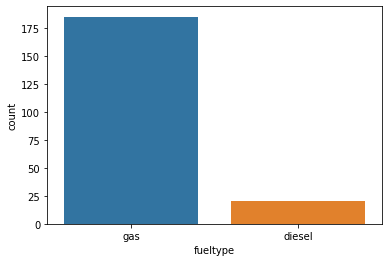

In [13]:
sns.countplot(x = cat_col['fueltype'])

In [14]:
df1 = pd.get_dummies(cat_col,drop_first = True)

In [15]:
df2 = df.select_dtypes(include = 'int64')

In [16]:
df2 = df2.drop(columns = ['car_ID'],axis = 1)

In [17]:
df2

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,3,2548,130,111,5000,21,27
1,3,2548,130,111,5000,21,27
2,1,2823,152,154,5000,19,26
3,2,2337,109,102,5500,24,30
4,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...
200,-1,2952,141,114,5400,23,28
201,-1,3049,141,160,5300,19,25
202,-1,3012,173,134,5500,18,23
203,-1,3217,145,106,4800,26,27


In [18]:
data = pd.concat([df2,df1,df3],axis = 1)

In [19]:
data.head()

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,...,fuelsystem_spdi,fuelsystem_spfi,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,3,2548,130,111,5000,21,27,1,0,1,...,0,0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,3,2548,130,111,5000,21,27,1,0,1,...,0,0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,1,2823,152,154,5000,19,26,1,0,1,...,0,0,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,2,2337,109,102,5500,24,30,1,0,0,...,0,0,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,2,2824,136,115,5500,18,22,1,0,0,...,0,0,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0


In [20]:
data.columns

Index(['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'price'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   curbweight             205 non-null    int64  
 2   enginesize             205 non-null    int64  
 3   horsepower             205 non-null    int64  
 4   peakrpm                205 non-null    int64  
 5   citympg                205 non-null    int64  
 6   highwaympg             205 non-null    int64  
 7   fueltype_gas           205 non-null    uint8  
 8   aspiration_turbo       205 non-null    uint8  
 9   doornumber_two         205 non-null    uint8  
 10  carbody_hardtop        205 non-null    uint8  
 11  carbody_hatchback      205 non-null    uint8  
 12  carbody_sedan          205 non-null    uint8  
 13  carbody_wagon          205 non-null    uint8  
 14  drivewheel_fwd         205 non-null    uint8  
 15  drivew

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
x = data.drop(columns = ['price'],axis = 1)

In [25]:
x.shape

(205, 43)

In [26]:
y = data['price']

In [27]:
y.shape

(205,)

In [28]:
 X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

In [29]:
X_train.shape

(143, 43)

In [30]:
Y_train.shape

(143,)

In [31]:
model = LinearRegression()

In [32]:
model = model.fit(X_train,Y_train)

In [33]:
model.score(X_train,Y_train)

0.9480262841259669

In [34]:
pred = model.predict(X_test)

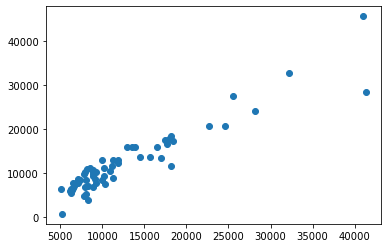

In [35]:
plt.scatter(Y_test,pred)

In [48]:
df = pd.Series(Y_test)

In [49]:
df

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
        ...   
39      8845.0
110    13860.0
164     8238.0
56     11845.0
176    10898.0
Name: price, Length: 62, dtype: float64

In [46]:
df1 = pd.Series(pred)

In [47]:
df1

0      6982.089070
1      5122.561535
2      6181.743986
3      6758.392070
4      7495.981435
          ...     
57     9753.500913
58    15829.325676
59     7016.573193
60    12289.191974
61    10361.975828
Length: 62, dtype: float64

In [53]:
df3 = pd.DataFrame([df,df1],columns = ["Y_test",'pred'])

In [54]:
df3

,Y_test,pred
price,NaN,NaN
Unnamed 0,NaN,NaN
